In [114]:
# 필요한 모듈 전체 로딩
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime as dt
import platform

# DF 불러오기

weather_df = pd.read_csv('daegu_utf8.csv', encoding = 'utf-8')
weather_df

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41445,2022-06-26,143,28.4,24.4,32.8
41446,2022-06-27,143,27.3,25.4,30.1
41447,2022-06-28,143,28.9,24.8,32.3
41448,2022-06-29,143,29.5,27.7,33.7


In [115]:
# 한글 폰트
if platform.system() == 'Windows':
    print('Window')
    font_name = fm.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    plt.rc('font', family = font_name)

else:
    print("Not support")     # window라서 다른거 안적어줌 

Window


In [116]:
# 날짜 컬럼을 object에서 datatime 타입으로 변경
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'])

In [117]:
# 3가지 질문 입력
first_year=int(input('시작 연도를 입력하세요.'))
last_year=int(input('마지막 연도를 입력하세요.'))
month=int(input('기온 변화를 측정할 달을 입력하세요.'))

# 검색 조건 변수 설정
year_df= weather_df[(weather_df['날짜'].dt.year>=first_year) & (weather_df['날짜'].dt.year<=last_year)]  
month_df=year_df[year_df['날짜'].dt.month==month]

시작 연도를 입력하세요.2011
마지막 연도를 입력하세요.2021
기온 변화를 측정할 달을 입력하세요.4


In [118]:
print(month_df)

              날짜   지점  평균기온  최저기온  최고기온
37343 2011-04-01  143  15.1   6.6  23.4
37344 2011-04-02  143  10.9   8.0  14.2
37345 2011-04-03  143   8.0   5.3  12.7
37346 2011-04-04  143   8.5   1.8  15.3
37347 2011-04-05  143  11.5   2.5  20.2
...          ...  ...   ...   ...   ...
41019 2021-04-26  143  13.6   6.3  21.1
41020 2021-04-27  143  15.8   8.1  22.2
41021 2021-04-28  143  18.1  11.6  23.9
41022 2021-04-29  143  18.3  13.5  24.7
41023 2021-04-30  143  16.9  12.6  22.2

[330 rows x 5 columns]


In [119]:
# 연도별 그룹화
year_group=month_df.groupby(month_df['날짜'].dt.year)

# 그룹화 후 각 컬럼 평균 만들어주기 
year_group.mean()

,지점,평균기온,최저기온,최고기온
날짜,,,,
2011,143.0,13.710000,8.046667,19.846667
2012,143.0,15.080000,9.533333,21.316667
2013,143.0,12.273333,6.603333,18.750000
2014,143.0,15.500000,10.060000,21.536667
2015,143.0,14.553333,9.496667,20.216667
2016,143.0,14.910000,9.480000,21.020000
2017,143.0,15.680000,9.633333,22.000000
2018,143.0,14.996667,8.873333,21.410000
2019,143.0,13.503333,7.980000,19.446667


In [120]:
# 연도별 최고/최저 평균기온
max_list=[]
min_list=[]
for i in year_group.mean()['최고기온'].values:
    max_list+=[round(i,1)]
for i in year_group.mean()['최저기온'].values:
    min_list+=[round(i,1)]

2011년부터 2021년까지 4월의 기온 변화

4월 최저기온 평균 :
8.0, 9.5, 6.6, 10.1, 9.5, 9.5, 9.6, 8.9, 8.0, 6.5, 8.8
4월 최고기온 평균 :
19.8, 21.3, 18.8, 21.5, 20.2, 21.0, 22.0, 21.4, 19.4, 19.0, 20.6


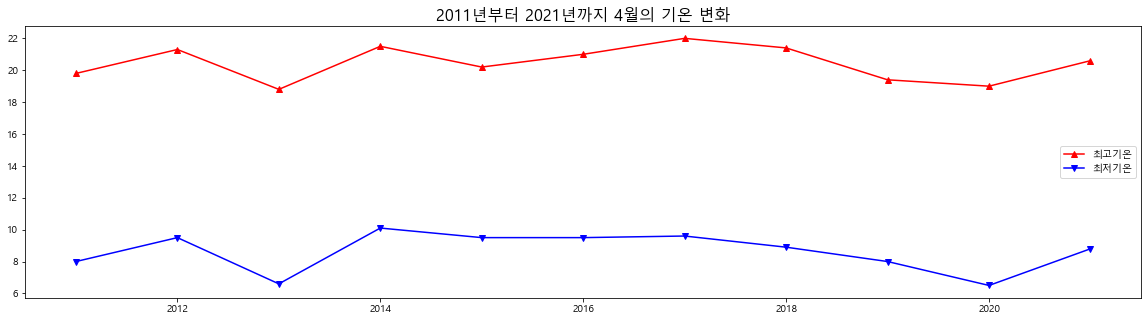

In [123]:
# x축 리스트
x_year=[]
for i in range(first_year,last_year+1):
    x_year+=[i]

# 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(x_year, max_list, 'red', marker='^', label='최고기온')
plt.plot(x_year, min_list, 'blue', marker='v', label='최저기온')

plt.rcParams['axes.unicode_minus'] = False
plt.title(f"{first_year}년부터 {last_year}년까지 {month}월의 기온 변화", size=16)
plt.legend(loc='center right')

# 출력
print(f'{first_year}년부터 {last_year}년까지 {month}월의 기온 변화\n')
print(f'{month}월 최저기온 평균 :\n{str(min_list)[1:-1]}')
print(f'{month}월 최고기온 평균 :\n{str(max_list)[1:-1]}')
plt.show()
